<a href="https://colab.research.google.com/github/brunod02/Analisis-evasi-n-clientes-parte2/blob/main/TelecomX_LATAM_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
datos = pd.read_csv('/content/datos_tratados.csv')
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
datos = datos.drop(columns=['customerID'])

In [ ]:
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuenta_diaria
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
X = datos.drop(columns=['Churn']) #X variables explicativas
y = datos['Churn']                #y variable de respuesta

In [ ]:
variables_categoricas = [
    "customer.gender",
    "customer.SeniorCitizen",
    "customer.Partner",
    "customer.Dependents",
    "phone.PhoneService",
    "phone.MultipleLines",
    "internet.InternetService",
    "internet.OnlineSecurity",
    "internet.DeviceProtection",
    "internet.TechSupport",
    "internet.StreamingTV",
    "internet.StreamingMovies",
    "account.Contract",
    "account.PaperlessBilling",
    "account.PaymentMethod"
]

In [ ]:
variables_numericas = [
    "customer.tenure",
    "account.Charges.Monthly",
    "account.Charges.Total",
    "Cuentas_Diarias"
]

# Transformación de las variables y encoding

In [ ]:
X.head()

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuenta_diaria
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
columnas = X.columns

In [ ]:
onehot = make_column_transformer((OneHotEncoder(drop='if_binary'),
 ['customer.gender', 'customer.Partner', 'phone.PhoneService',	'phone.MultipleLines',
  'internet.InternetService',	'internet.OnlineSecurity',
  'internet.OnlineBackup'	,'internet.DeviceProtection',
  'internet.TechSupport'	,'internet.StreamingTV',	'internet.StreamingMovies',
  'account.Contract'	,'account.PaperlessBilling',	'account.PaymentMethod'  ]),
  remainder='passthrough', sparse_threshold=0, force_int_remainder_cols=False)

In [ ]:
X = onehot.fit_transform(X)

In [ ]:
onehot.get_feature_names_out(columnas)

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_No',
       'onehotencoder__internet.OnlineSecurity_No internet service',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehotencoder__internet.DeviceProtection_Yes',
       'on

In [ ]:
pd.DataFrame(X, columns=onehot.get_feature_names_out(columnas))

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineSecurity_No,...,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.Dependents,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__cuenta_diaria
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,Yes,9,65.6,593.3,2.186667
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,No,9,59.9,542.4,1.996667
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,No,4,73.9,280.85,2.463333
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1,No,13,98.0,1237.85,3.266667
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1,No,3,83.9,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,No,13,55.15,742.9,1.838333
7039,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,No,22,85.1,1873.7,2.836667
7040,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,No,2,50.3,92.75,1.676667
7041,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,Yes,67,67.85,4627.65,2.261667


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
y = pd.DataFrame(y, columns=['Churn'])
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [ ]:
X = pd.DataFrame(X, columns=onehot.get_feature_names_out(columnas))
X

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineSecurity_No,...,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.Dependents,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__cuenta_diaria
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,Yes,9,65.6,593.3,2.186667
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,No,9,59.9,542.4,1.996667
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,No,4,73.9,280.85,2.463333
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1,No,13,98.0,1237.85,3.266667
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1,No,3,83.9,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,No,13,55.15,742.9,1.838333
7039,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,No,22,85.1,1873.7,2.836667
7040,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,No,2,50.3,92.75,1.676667
7041,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,Yes,67,67.85,4627.65,2.261667


In [254]:
X.corr()

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineSecurity_No,...,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.Dependents,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__cuenta_diaria
onehotencoder__customer.gender_Male,1.000000,-0.001808,-0.006488,0.004476,0.006488,-0.008414,0.006568,-0.011286,0.006026,0.010429,...,-0.016024,0.001215,0.000752,0.013744,-0.001874,0.010517,0.005106,-0.014569,-0.000080,-0.014569
onehotencoder__customer.Partner_Yes,-0.001808,1.000000,0.017706,-0.129929,-0.017706,0.142057,-0.000851,0.000304,0.000615,-0.129936,...,0.110706,0.082029,-0.083852,-0.095125,0.016479,0.452676,0.379697,0.096848,0.317504,0.096848
onehotencoder__phone.PhoneService_Yes,-0.006488,0.017706,1.000000,0.315431,-1.000000,0.279690,-0.452425,0.289999,0.172209,-0.057880,...,0.007556,-0.007721,0.003062,-0.003319,0.008576,-0.001762,0.008448,0.247398,0.113214,0.247398
onehotencoder__phone.MultipleLines_No,0.004476,-0.129929,0.315431,1.000000,-0.315431,-0.822853,-0.070179,-0.190192,0.310046,-0.118040,...,-0.070178,-0.063921,-0.080836,0.222605,-0.136213,0.023198,-0.323088,-0.338314,-0.396059,-0.338314
onehotencoder__phone.MultipleLines_No phone service,0.006488,-0.017706,-1.000000,-0.315431,1.000000,-0.279690,0.452425,-0.289999,-0.172209,0.057880,...,-0.007556,0.007721,-0.003062,0.003319,-0.008576,0.001762,-0.008448,-0.247398,-0.113214,-0.247398
onehotencoder__phone.MultipleLines_Yes,-0.008414,0.142057,0.279690,-0.822853,-0.279690,1.000000,-0.199920,0.366083,-0.210564,0.084766,...,0.075527,0.060048,0.083618,-0.227206,0.142948,-0.024526,0.331941,0.490434,0.468504,0.490434
onehotencoder__internet.InternetService_DSL,0.006568,-0.000851,-0.452425,-0.070179,0.452425,-0.199920,1.000000,-0.640987,-0.380635,0.023066,...,0.025476,0.051438,-0.104418,0.041899,-0.108322,0.052010,0.013274,-0.160189,-0.052469,-0.160189
onehotencoder__internet.InternetService_Fiber optic,-0.011286,0.000304,0.289999,-0.190192,-0.289999,0.366083,-0.640987,1.000000,-0.465793,0.411561,...,-0.022624,-0.050077,0.336410,-0.306834,0.255338,-0.165818,0.019720,0.787066,0.361655,0.787066
onehotencoder__internet.InternetService_No,0.006026,0.000615,0.172209,0.310046,-0.172209,-0.210564,-0.380635,-0.465793,1.000000,-0.522429,...,-0.002113,0.001030,-0.284917,0.321361,-0.182742,0.139812,-0.039062,-0.763557,-0.375223,-0.763557
onehotencoder__internet.OnlineSecurity_No,0.010429,-0.129936,-0.057880,-0.118040,0.057880,0.084766,0.023066,0.411561,-0.522429,1.000000,...,-0.084322,-0.105510,0.336364,-0.191715,0.185532,-0.188434,-0.263746,0.360898,-0.063137,0.360898


# Verificación de la Proporción de Cancelación (Churn)

In [ ]:
y.value_counts(normalize=True)*100

,proportion
Churn,
0,73.463013
1,26.536987


In [ ]:
X['remainder__customer.Dependents'] = X['remainder__customer.Dependents'].replace({'No': 0, 'Yes': 1})

In [ ]:
X.head()

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineSecurity_No,...,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.Dependents,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__cuenta_diaria
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,1,9,65.6,593.3,2.186667
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,0,9,59.9,542.4,1.996667
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,0,4,73.9,280.85,2.463333
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1,0,13,98.0,1237.85,3.266667
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1,0,3,83.9,267.4,2.796667


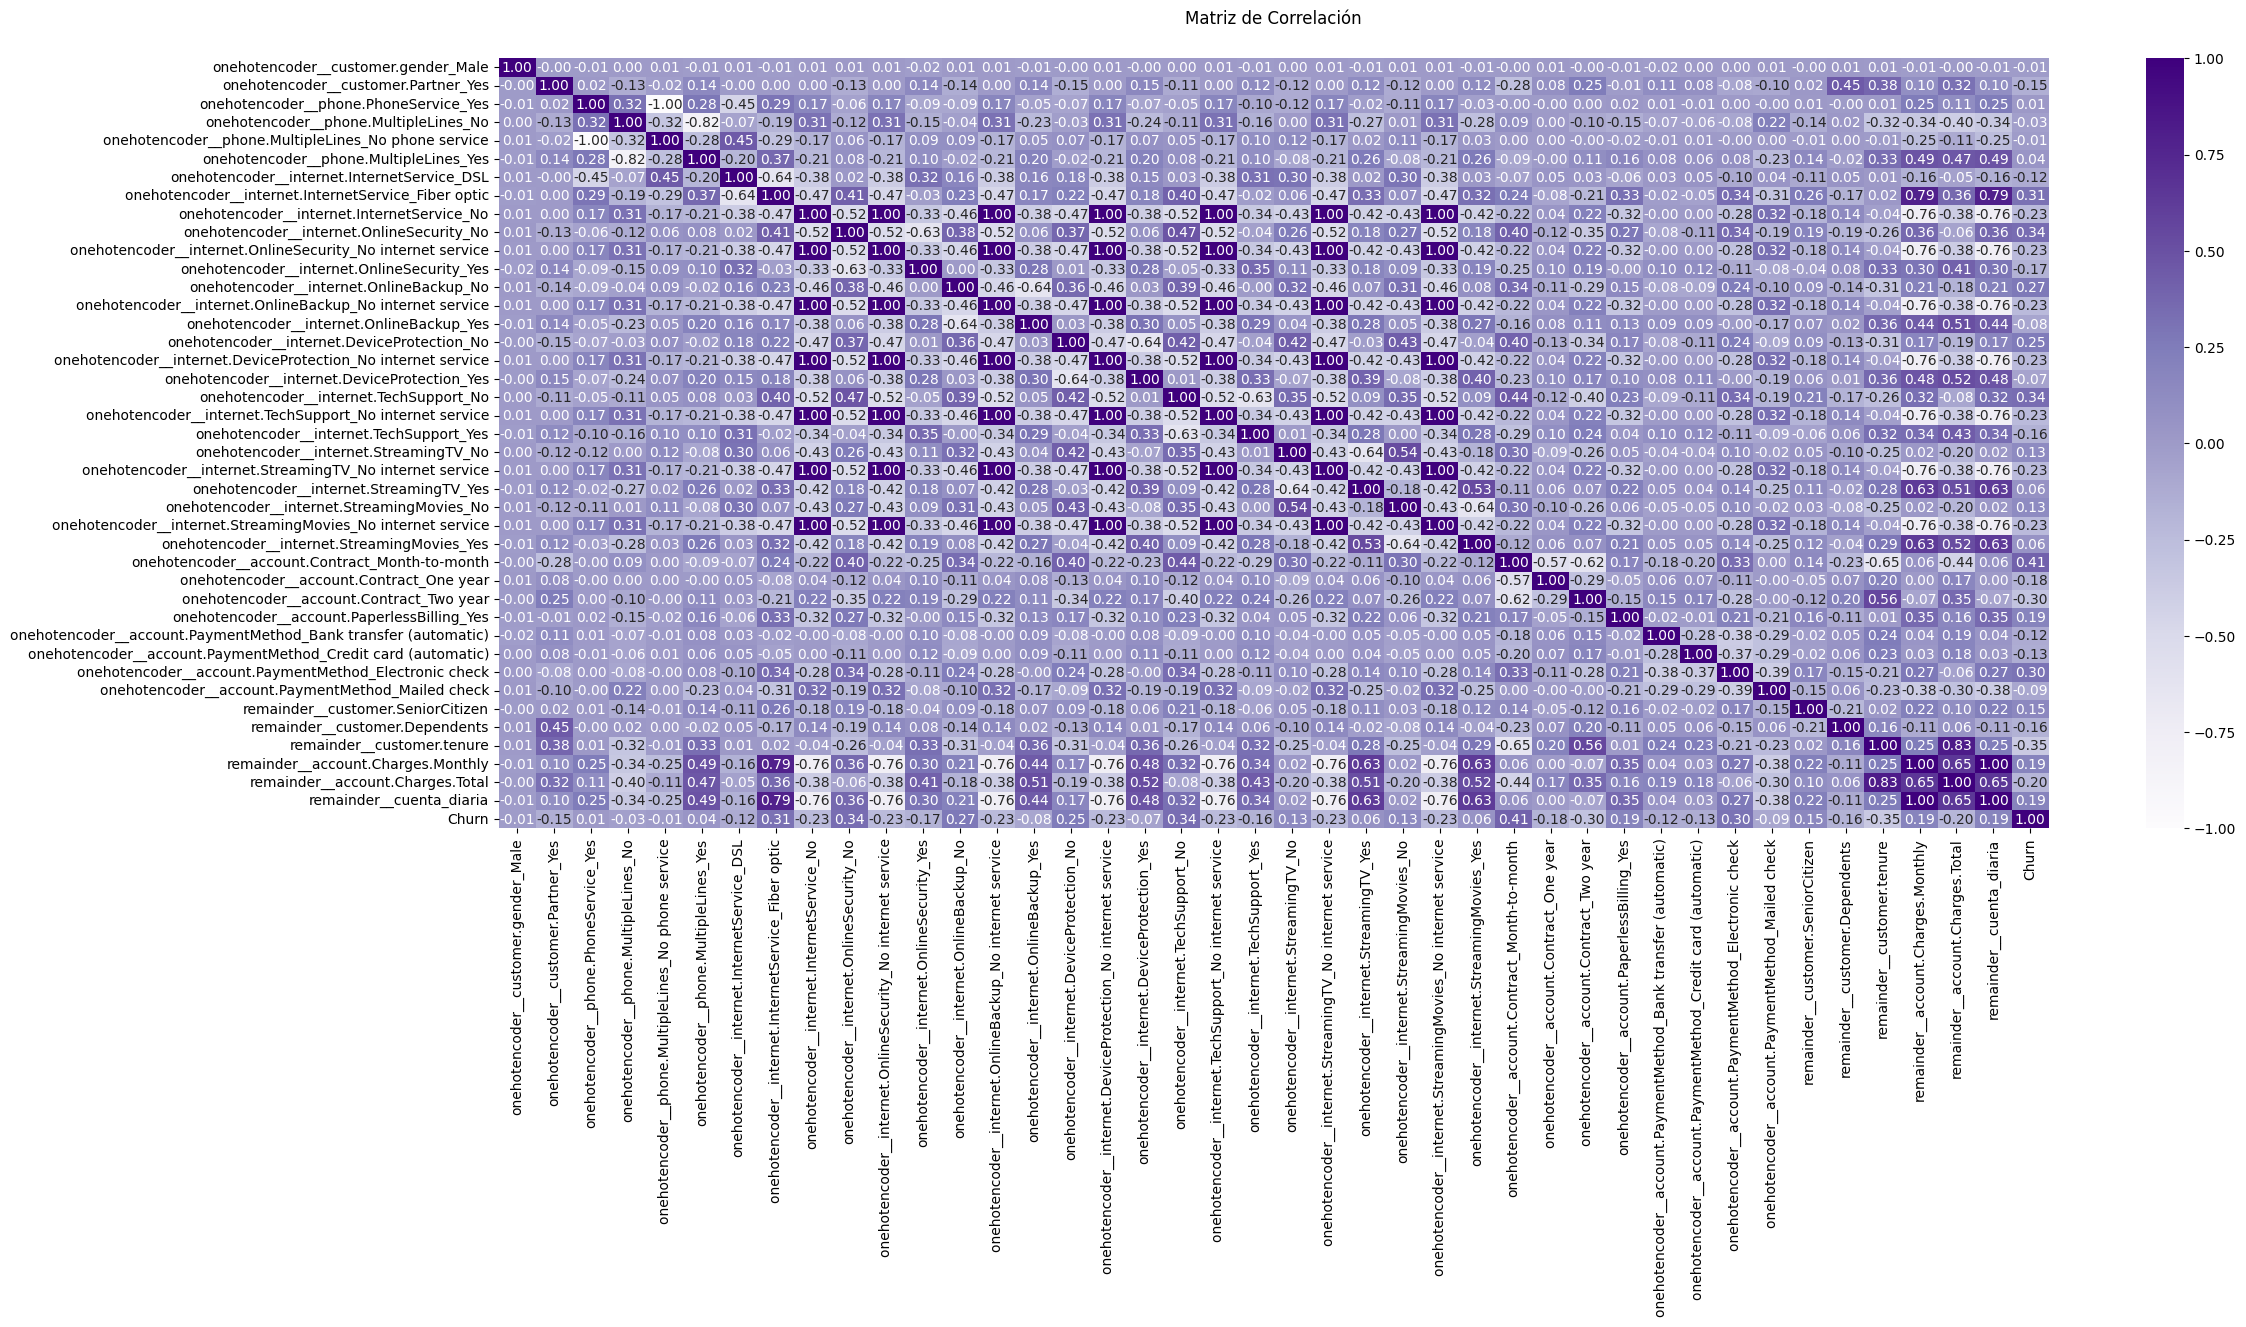

In [251]:
plt.figure(figsize=(25,10))
sns.heatmap(pd.concat([X, y], axis = 1).corr(), cmap='Purples', annot = True, fmt = ".2f")
plt.title("Matriz de Correlación", pad= 25)
plt.show()

In [ ]:
pd.concat([X, y], axis=1).corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
onehotencoder__account.Contract_Month-to-month,0.405103
onehotencoder__internet.OnlineSecurity_No,0.342637
onehotencoder__internet.TechSupport_No,0.337281
onehotencoder__internet.InternetService_Fiber optic,0.308020
onehotencoder__account.PaymentMethod_Electronic check,0.301919
onehotencoder__internet.OnlineBackup_No,0.268005
onehotencoder__internet.DeviceProtection_No,0.252481
remainder__account.Charges.Monthly,0.193356
remainder__cuenta_diaria,0.193356


# Analisis Dirigido

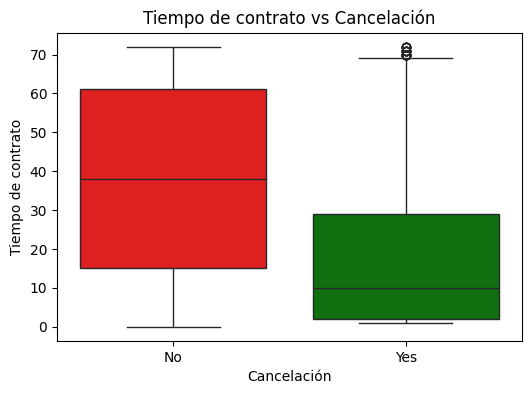

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(data = datos, x = datos['Churn'],
            y = 'customer.tenure',
            hue = datos['Churn'],
            palette = ['red', 'green'],
            )


plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato')
plt.show()

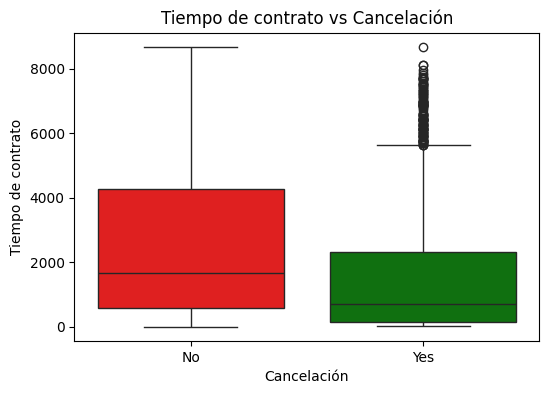

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(data = datos, x = datos['Churn'],
            y = 'account.Charges.Total',
            hue = datos['Churn'],
            palette = ['red', 'green'],
            )


plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato')
plt.show()

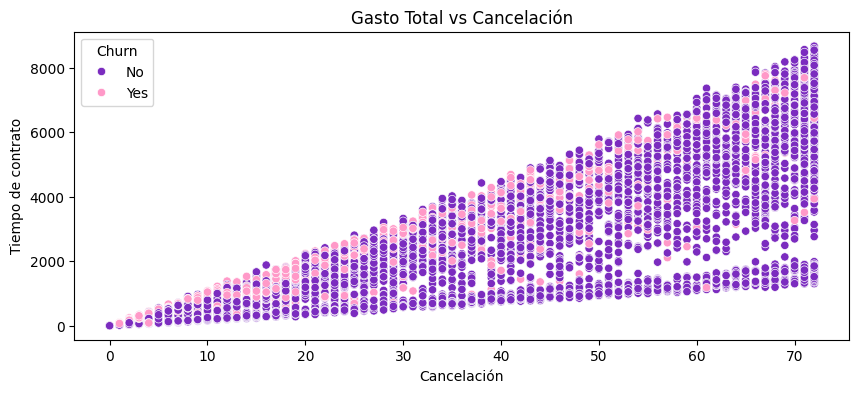

In [ ]:
plt.figure(figsize = (10,4))
sns.scatterplot(data = datos, x = 'customer.tenure',
            y = 'account.Charges.Total',
            hue = datos['Churn'],
            palette = ['#7b2cbf', '#ff99c8'],
            )
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato')
plt.show()

# Separación de datos de prueba y entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y , random_state=42)

# Modelo de refencia con Dummy

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7348097671777399

In [252]:
print(classification_report(y_test, dummy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1294
           1       0.00      0.00      0.00       467

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.73      0.62      1761



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


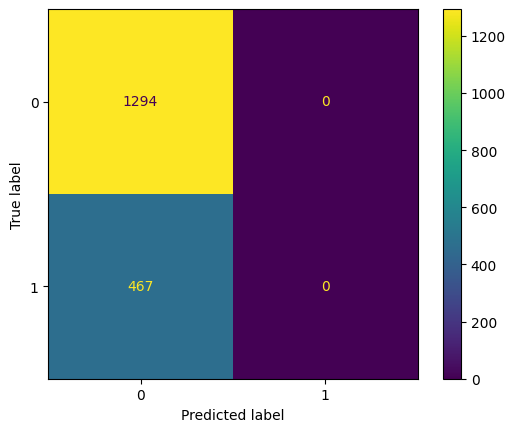

In [253]:
y_pred_dummy = dummy.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy.classes_)
disp.plot();

# Arbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
modelo_arbol = DecisionTreeClassifier(random_state=42, max_depth=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
modelo_arbol.score(X_test, y_test)

0.7881885292447472

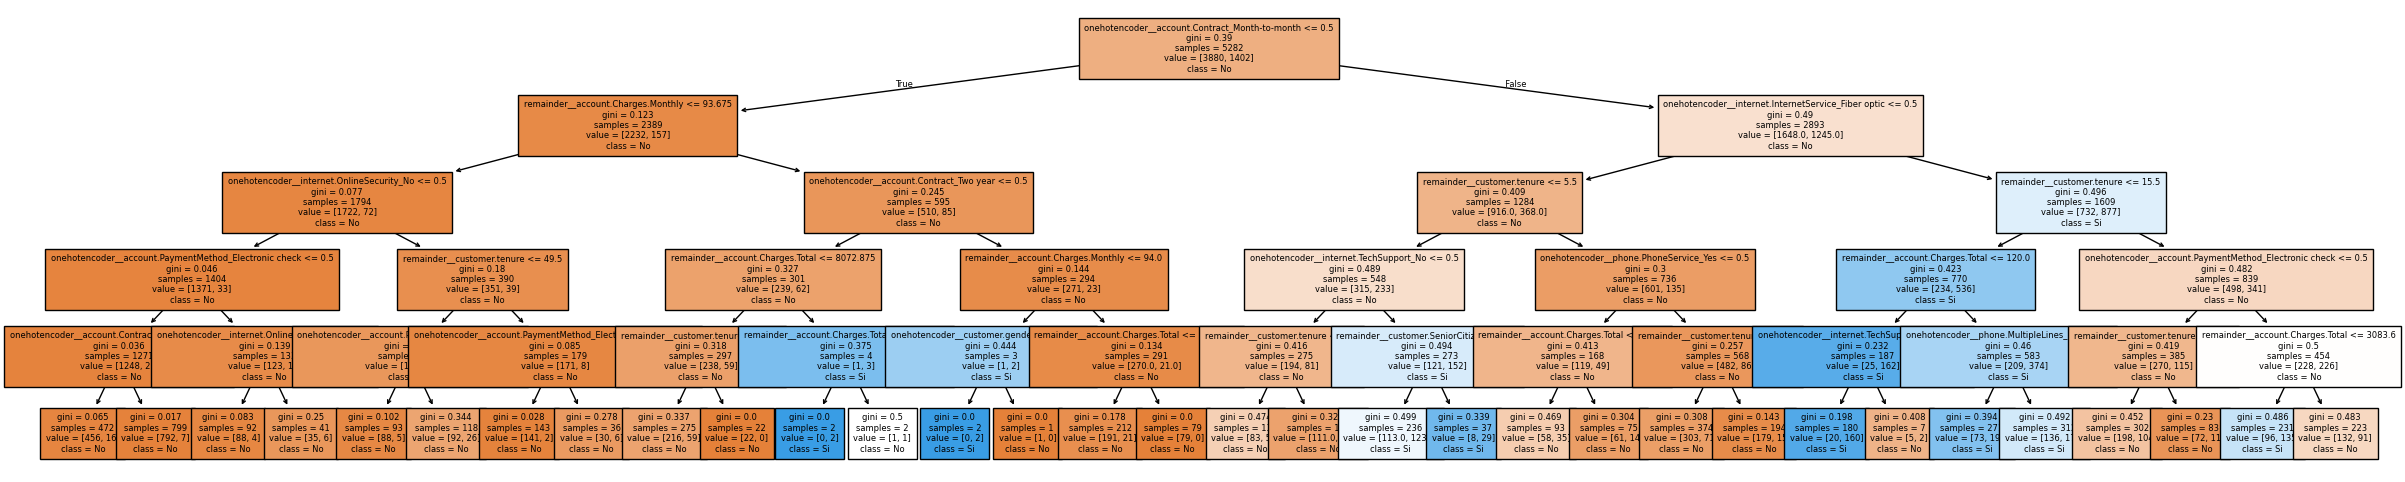

In [ ]:
plt.figure(figsize=(30,6))
plot_tree(modelo_arbol, filled=True, class_names=['No', 'Si'], fontsize=6, feature_names=X.columns)
plt.show()

In [ ]:
y_arbol_decision = modelo_arbol.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_arbol_decision))

Accuracy: 0.7881885292447472


In [ ]:
print(classification_report(y_test, y_arbol_decision))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1294
           1       0.61      0.57      0.59       467

    accuracy                           0.79      1761
   macro avg       0.73      0.72      0.72      1761
weighted avg       0.78      0.79      0.79      1761



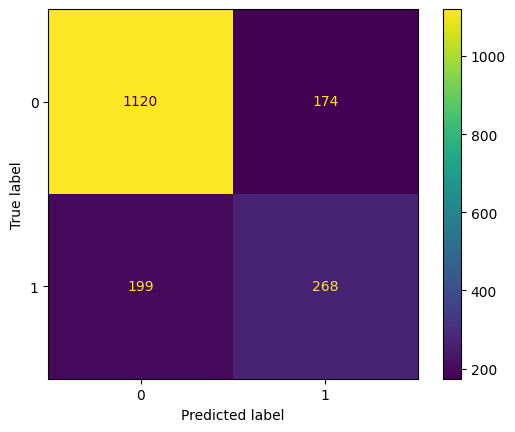

In [ ]:
cm = confusion_matrix(y_test, y_arbol_decision)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_arbol.classes_)
disp.plot();

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_random_forest = RandomForestClassifier(n_estimators = 300,
                                       max_depth = 5,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       random_state = 5,
                                       n_jobs = -1)
modelo_random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=5, n_estimators=300, n_jobs=-1, random_state=5)

In [ ]:
modelo_random_forest.score(X_test, y_test)
y_rf = modelo_random_forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_rf))

Accuracy: 0.7876206700738216


In [ ]:
importances = modelo_random_forest.feature_importances_

In [ ]:
feature_importances = pd.DataFrame({'Features': X.columns,'importances': ((importances)*100).round(2)})
feature_importances.sort_values('importances', ascending=False)

,Features,importances
27,onehotencoder__account.Contract_Month-to-month,16.66
37,remainder__customer.tenure,14.88
39,remainder__account.Charges.Total,8.98
18,onehotencoder__internet.TechSupport_No,7.88
9,onehotencoder__internet.OnlineSecurity_No,6.64
7,onehotencoder__internet.InternetService_Fiber ...,6.39
29,onehotencoder__account.Contract_Two year,5.74
33,onehotencoder__account.PaymentMethod_Electroni...,4.85
40,remainder__cuenta_diaria,3.94
38,remainder__account.Charges.Monthly,3.34


In [ ]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1294
           1       0.65      0.44      0.52       467

    accuracy                           0.79      1761
   macro avg       0.73      0.68      0.69      1761
weighted avg       0.77      0.79      0.77      1761



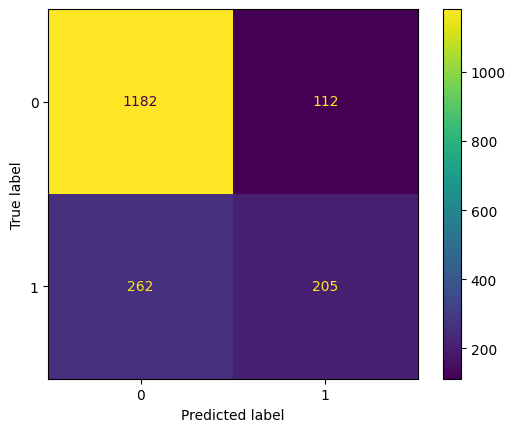

In [ ]:
cm = confusion_matrix(y_test, y_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_arbol.classes_)
disp.plot();

# Normalización de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalización = MinMaxScaler()
X_train_normalizada = normalización.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train_normalizada)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.625000,0.772795,0.513155,0.772795
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.013889,0.510214,0.008014,0.510214
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.847222,0.678127,0.595903,0.678127
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.888889,0.869457,0.794848,0.869457
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.013889,0.561036,0.008601,0.561036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.555556,0.625810,0.379088,0.625810
5278,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.722222,0.061286,0.153262,0.061286
5279,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.305556,0.023418,0.052085,0.023418
5280,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.333333,0.062780,0.065833,0.062780


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [274]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_normalizada, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=10)

In [272]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 31)}

knn_base = KNeighborsClassifier()

grid_search = GridSearchCV(knn_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_normalizada, y_train.values.ravel())

best_n_neighbors = grid_search.best_params_['n_neighbors']

print(f"El mejor valor de n_neighbors encontrado es: {best_n_neighbors}")

El mejor valor de n_neighbors encontrado es: 30


In [243]:
X_test_normalizada = normalización.transform(X_test)

In [244]:
knn.score(X_test_normalizada, y_test)

0.78137421919364

In [245]:
print(classification_report(y_test, knn.predict(X_test_normalizada)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1294
           1       0.60      0.54      0.57       467

    accuracy                           0.78      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.77      0.78      0.78      1761



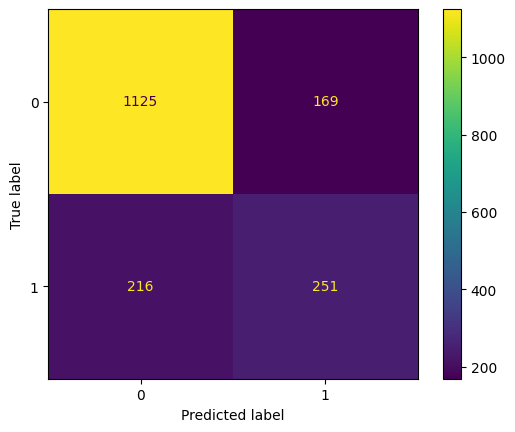

In [246]:
cm = confusion_matrix(y_test, knn.predict(X_test_normalizada))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

## Evaluación de los Modelos


In [247]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [248]:
modelos = [('Dummy', dummy, X_test),
           ('Arbol', modelo_arbol, X_test),
           ('RandomForest', modelo_random_forest, X_test),
           ('Knn', knn, X_test_normalizada)]

resultados = []

for nombre, modelo, X_data_for_model in modelos:
    # Predicciones
    y_pred = modelo.predict(X_data_for_model)
    y_proba = modelo.predict_proba(X_data_for_model)[:, 1]

    # Métricas
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred, zero_division=0),
        "AUC": roc_auc_score(y_test, y_proba)
    })

In [249]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,Accuracy,Precision,Recall,F1-score,AUC
0,Dummy,0.734810,0.000000,0.000000,0.000000,0.500000
1,Arbol,0.788189,0.606335,0.573876,0.589659,0.829623
2,RandomForest,0.787621,0.646688,0.438972,0.522959,0.840215
3,Knn,0.781374,0.597619,0.537473,0.565953,0.819892


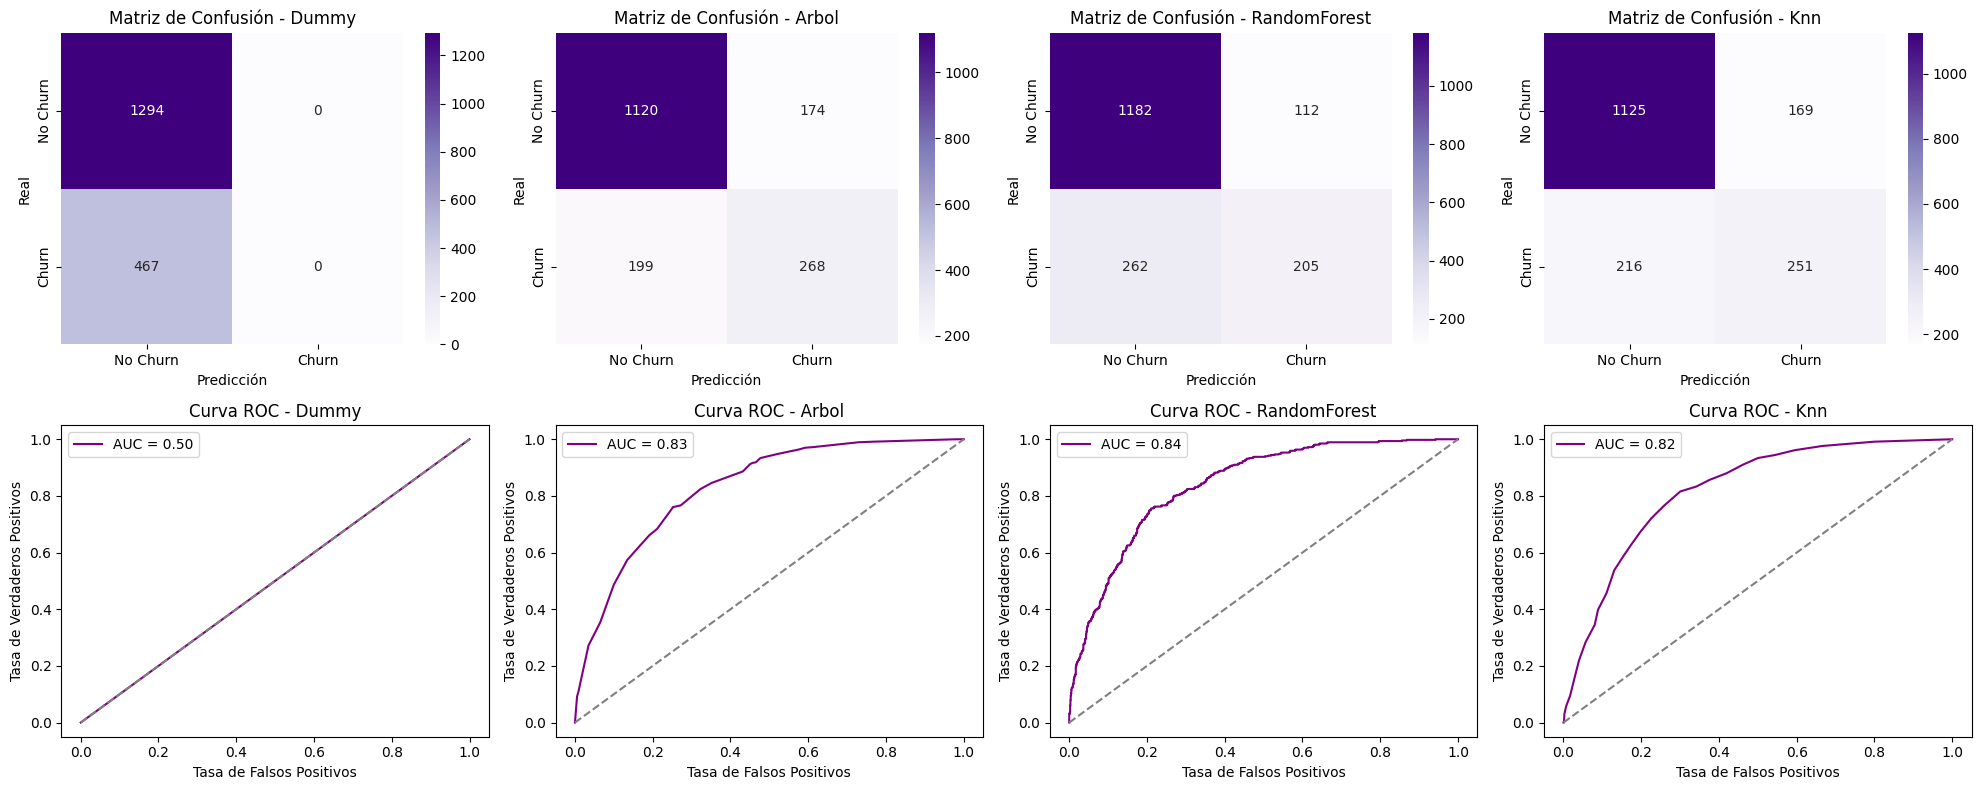

In [250]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

modelos = [('Dummy', dummy, X_test),
           ('Arbol', modelo_arbol, X_test),
           ('RandomForest', modelo_random_forest, X_test),
           ('Knn', knn, X_test_normalizada)]


# Crear figura con 2 filas y 4 columnas (una por cada modelo)
fig, axes = plt.subplots(2, len(modelos), figsize=(len(modelos)*5, 8))

# FILA 1: MATRICES DE CONFUSIÓN

for idx, (nombre, modelo, X_data_for_model) in enumerate(modelos):
    ax = axes[0, idx]  # fila 0, columna idx

    y_pred = modelo.predict(X_data_for_model)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'],
                ax=ax)

    ax.set_title(f'Matriz de Confusión - {nombre}')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")


# FILA 2: CURVAS ROC

for idx, (nombre, modelo, X_data_for_model) in enumerate(modelos):
    ax = axes[1, idx]


    if hasattr(modelo, 'predict_proba'):
        y_proba = modelo.predict_proba(X_data_for_model)[:, 1]
    else:

        if hasattr(modelo, 'decision_function'):
            y_proba = modelo.decision_function(X_data_for_model)
        else:

            y_proba = modelo.predict(X_data_for_model)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='purple', label=f"AUC = {roc_auc:.2f}")
    ax.plot([0,1], [0,1], linestyle='--', color='gray')

    ax.set_title(f"Curva ROC - {nombre}")
    ax.set_xlabel("Tasa de Falsos Positivos")
    ax.set_ylabel("Tasa de Verdaderos Positivos")
    ax.legend()

plt.tight_layout()
plt.show()

1. Mejor desempeño:
El Árbol de Decisión (Arbol) tuvo el mejor desempeño general, con la Accuracy (0.7882), F1-score (0.5897) y AUC (0.8296) más altos.

2. Overfitting o Underfitting:
Underfitting: El Dummy Classifier sufrió claramente de underfitting. El KNN también mostró indicios de underfitting (o falta de optimización de hiperparámetros).
Overfitting: Los modelos Árbol de Decisión y Random Forest no mostraron signos evidentes de overfitting severo en el conjunto de prueba, gracias a las restricciones aplicadas (como max_depth en el árbol individual) y la naturaleza robusta del Random Forest.

# Análisis de la Importancia de las Variables


In [265]:
importancia_DecissionTree = pd.DataFrame({'Variable': X_train.columns,
                           'Coeficiente': modelo_arbol.feature_importances_}).sort_values(by = 'Coeficiente', ascending = False)*100
importancia_DecissionTree

,Variable,Coeficiente
27,onehotencoder__account.Contract_Month-to-month...,51.299428
37,remainder__customer.tenureremainder__customer....,17.903748
7,onehotencoder__internet.InternetService_Fiber ...,14.066304
39,remainder__account.Charges.Totalremainder__acc...,4.184791
18,onehotencoder__internet.TechSupport_Noonehoten...,2.777933
33,onehotencoder__account.PaymentMethod_Electroni...,2.748526
38,remainder__account.Charges.Monthlyremainder__a...,1.699739
3,onehotencoder__phone.MultipleLines_Noonehotenc...,1.185909
29,onehotencoder__account.Contract_Two yearonehot...,0.771016
2,onehotencoder__phone.PhoneService_Yesonehotenc...,0.752099


In [266]:
importancia_Random_Forest = pd.DataFrame({'Variable': X_train.columns,
                           'Coeficiente': modelo_random_forest.feature_importances_}).sort_values(by = 'Coeficiente', ascending = False)*100
importancia_Random_Forest

,Variable,Coeficiente
27,onehotencoder__account.Contract_Month-to-month...,16.661559
37,remainder__customer.tenureremainder__customer....,14.882109
39,remainder__account.Charges.Totalremainder__acc...,8.981771
18,onehotencoder__internet.TechSupport_Noonehoten...,7.879069
9,onehotencoder__internet.OnlineSecurity_Nooneho...,6.636331
7,onehotencoder__internet.InternetService_Fiber ...,6.385890
29,onehotencoder__account.Contract_Two yearonehot...,5.737992
33,onehotencoder__account.PaymentMethod_Electroni...,4.846036
40,remainder__cuenta_diariaremainder__cuenta_diar...,3.938058
38,remainder__account.Charges.Monthlyremainder__a...,3.336817


In [270]:
knn_final = KNeighborsClassifier(n_neighbors=30)
knn_final.fit(X_train_normalizada, y_train.values.ravel())

result = permutation_importance(knn_final, X_test_normalizada, y_test,
                                n_repeats=10,
                                random_state=42,
                                n_jobs=-1)

sorted_idx = result.importances_mean.argsort()
feature_importance_knn = pd.DataFrame({
    'Variable': X.columns[sorted_idx],
    'Importancia Media': result.importances_mean[sorted_idx] * 100,
    'Desviación Estándar': result.importances_std[sorted_idx] * 100
})

display(feature_importance_knn.sort_values(by='Importancia Media', ascending=False))

,Variable,Importancia Media,Desviación Estándar
40,remainder__customer.tenure,1.408291,0.371330
39,onehotencoder__account.Contract_Month-to-month,0.516752,0.199075
38,onehotencoder__account.PaymentMethod_Electroni...,0.488359,0.321430
37,remainder__account.Charges.Total,0.477002,0.291992
36,remainder__customer.SeniorCitizen,0.391823,0.187394
34,onehotencoder__phone.MultipleLines_No phone se...,0.335037,0.082094
35,onehotencoder__phone.PhoneService_Yes,0.335037,0.082094
33,onehotencoder__internet.InternetService_DSL,0.329358,0.237959
32,onehotencoder__account.PaymentMethod_Mailed check,0.300965,0.270017
31,onehotencoder__account.PaymentMethod_Credit ca...,0.283930,0.201570


# Conclusiones finales

## Factores de Cancelación y Estrategias Propuestas:

A continuación, se presentan estrategias de retención de clientes directamente derivadas de los factores de cancelación identificados, buscando mitigar su impacto y mejorar la fidelización.

1.  Tipo de Contrato: Mes a Mes
    *   **Impacto:** Clientes con contratos mensuales tienen una mayor propensión a la cancelación, probablemente debido a la falta de compromiso a largo plazo y la facilidad para cambiar de proveedor.
    *   **Estrategia de Retención:** Ofrecer incentivos atractivos para la renovación de contratos a plazos más largos (uno o dos años), como descuentos significativos en la tarifa mensual, mejoras gratuitas de servicio (por ejemplo, mayor velocidad de internet, canales premium) o dispositivos gratuitos/con descuento al firmar un contrato a término. Crear paquetes de fidelización que recompensen la permanencia.

2.  Tiempo de Tenencia
    *   **Impacto:** Los clientes con menor tiempo de tenencia son más propensos a cancelar, indicando que el período inicial es crítico para la retención.
    *   **Estrategia de Retención:** Implementar un programa de bienvenida robusto que incluya seguimiento proactivo (llamadas, emails) durante los primeros 3-6 meses para asegurar la satisfacción, resolver problemas rápidamente y educar sobre el uso óptimo de los servicios. Ofrecer un punto de contacto dedicado para nuevos clientes.

3.  Servicio de Internet: Fibra Óptica
    *   **Impacto:** Aunque la fibra óptica es un servicio avanzado, los clientes que lo tienen muestran una mayor tasa de cancelación. Esto podría deberse a expectativas no cumplidas, problemas de estabilidad o altos costos.
    *   **Estrategia de Retención:** Realizar encuestas de satisfacción específicas para usuarios de fibra óptica. Ofrecer soporte técnico prioritario y especializado para este segmento. Comunicar claramente los beneficios y la diferencia de la fibra óptica y justificar su valor. Monitorear proactivamente la calidad del servicio de fibra y actuar ante cualquier anomalía.

4.  Falta de Soporte Técnico
    *   **Impacto:** Los clientes sin soporte técnico son más propensos a cancelar, ya que no tienen un recurso para resolver problemas.
    *   **Estrategia de Retención:** Promocionar activamente los servicios de soporte técnico existentes, asegurando que los clientes estén conscientes de cómo acceder a ellos. Ofrecer paquetes de servicio que incluyan soporte técnico premium o asistencia remota. Invertir en la mejora de la calidad y tiempos de respuesta del soporte para reducir la frustración del cliente.

5.  Falta de Seguridad Online
    *   **Impacto:** Clientes sin servicios de seguridad online son más vulnerables y pueden sentir menos confianza en su proveedor, lo que lleva a la cancelación.
    *   Estrategia de Retención:** Incluir servicios básicos de seguridad online (antivirus, firewall) de forma gratuita o a bajo costo como parte de los paquetes de internet. Educar a los clientes sobre los riesgos de seguridad y cómo la empresa puede protegerlos. Ofrecer actualizaciones a planes de seguridad más completos con incentivos.

6.  Método de Pago: Cheque Electrónico
    *   **Impacto:** Los clientes que pagan con cheque electrónico tienen una mayor tasa de cancelación. Esto podría indicar una menor estabilidad financiera o un proceso de pago menos automatizado que puede generar fricción.
    *   **Estrategia de Retención:** Incentivar el cambio a métodos de pago más convenientes y automatizados como tarjetas de crédito/débito o domiciliación bancaria, ofreciendo pequeños descuentos o recompensas por la configuración de pagos automáticos. Simplificar el proceso de pago electrónico para reducir la fricción.

7.  Cargos Totales
    *   **Impacto:** Un alto monto de cargos totales (acumulados a lo largo del tiempo) se correlaciona con la cancelación, lo que sugiere insatisfacción con el costo acumulado o percepción de poco valor por el dinero.
    *   **Estrategia de Retención:** Ofrecer revisiones periódicas de las cuentas de los clientes de alto valor, buscando optimizar sus planes de servicio para asegurar que estén obteniendo el mejor valor. Proponer descuentos por fidelidad a largo plazo o paquetes personalizados que se ajusten a sus necesidades y presupuesto, mitigando la percepción de altos costos acumulados.

